# Tutorial video 4 - PRIMITIVES
[Youtube link](https://www.youtube.com/watch?v=35ykEg3fG4c&t=165s)

Primitive - **smallest** processing instruction for a given **abstraction** level (black-box), no need to worry about implementation.

## Primitives discussed

- Estimator primitive: computes expval of observables with the respective states prepared by q-circuits.

- Sampler primitive (can be used as estimator, but need more postprocessing): returns shot by shot bit strings sampled from the probability distribution of the q-state prepared on the device.

## Circuits to test primitives

Ising model compared with classical.

Based on article [Evidence for the utility of quantum computing before fault tolerance (2023)](https://www.nature.com/articles/s41586-023-06096-3)

Simulating this hamiltonian dynamics:

$H=-\,J\sum _{\langle i,j\rangle }{Z}_{i}{Z}_{j}+h\sum _{i}{X}_{i}$

$e^{-iH_{ZZ}\delta t} = \prod_{\langle i,j \rangle}e^{iJ\delta t Z_i Z_j} = \prod_{\langle i,j \rangle} R_{Z_iZ_j}(-2J\delta t)$

$e^{-iH_{X}\delta t} = \prod_i e^{ih\delta t X_i} = \prod_i R_{X_i}(2h\delta t)$

$i$ - trotter steps IN TOTAL?. $2h\delta t$ - angle.

ZZ on neighbours, X on all qubits





## Transverse field Ising model to demo primitives

Trotter steps fwd in time, then bwd in time. Should be all 0s in the end (but noise)

Map the problem into circuits and operators. (Apply magnetic field after every trotter step)

We could go naively through all pairs i=0,1,2,3... we get a ladder of ZZ gates (more noise). Do compressing. With layers.

In paper - 2d case with 3 layers (RBG). In 1d case: 2 layers:
- EVEN: 01, 23, 45...
- ODD: 12, 34, 56...

In [7]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate

# No sqrtY or sqrtYdagger, so let's create using UnitaryGate
SYGate = UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")

def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle):
    qc = QuantumCircuit(num_qubits)

    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle)

    return qc

def add_1d_tfim_trotter_layer(qc, rx_angle):
    #
    #   +-------------+
    #  -|             |-     -- S^dagger --------------+----------------------
    #   |  Rzz(-pi/2) |   =                            |
    #  -|             |-     -- S^dagger -- sqrt(Y) -- CX -- sqrt(Y)^dagger --
    #   +-------------+
    #

    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    
    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])

    # Adding Rx gates
    qc.rx(rx_angle, list(range(qc.num_qubits)))
    


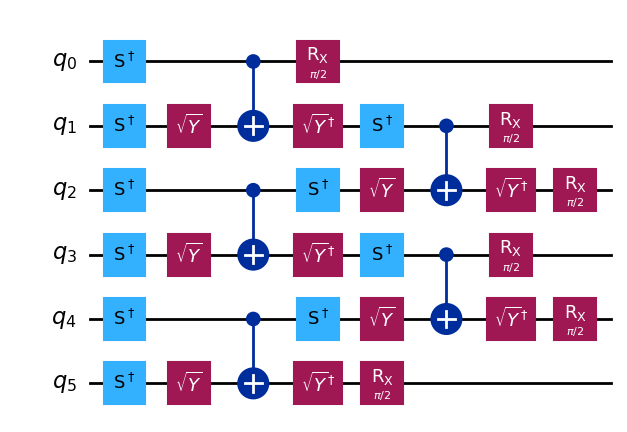

In [8]:
num_qubits = 6
num_trotter_steps = 1
rx_angle = 0.5 * np.pi

qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle)
qc.draw(output='mpl', fold=-1)